In [1]:
import nn_classification as classifier
import pandas as pd
from torch.utils.data import DataLoader

### Load Data

In [2]:
# Load dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()
train_df, val_df, test_df = classifier.split_dataset(diabetes_df)

# Ready dataset
# Create an instance of the DiabetesDataset
dataset_train = classifier.DiabetesDataset(train_df)
dataset_val = classifier.DiabetesDataset(val_df)
dataset_test = classifier.DiabetesDataset(test_df)

# Create a DataLoader based on train, validation, and test sets
dataloader_train = DataLoader(dataset_train, batch_size=25, shuffle=True,)
dataloader_val = DataLoader(dataset_val, batch_size=25, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=25, shuffle=True)

Epoch 1/10000, Loss: 0.7366, Accuracy: 0.5584%
Epoch 101/10000, Loss: 0.5673, Accuracy: 0.7266%
Epoch 201/10000, Loss: 0.5849, Accuracy: 0.6963%
Epoch 301/10000, Loss: 0.5640, Accuracy: 0.7196%
Epoch 401/10000, Loss: 0.5470, Accuracy: 0.7126%
Epoch 501/10000, Loss: 0.5377, Accuracy: 0.7430%
Epoch 601/10000, Loss: 0.5079, Accuracy: 0.7593%
Epoch 701/10000, Loss: 0.5418, Accuracy: 0.7570%
Epoch 801/10000, Loss: 0.4948, Accuracy: 0.7664%
Epoch 901/10000, Loss: 0.5669, Accuracy: 0.7290%
Epoch 1001/10000, Loss: 0.4960, Accuracy: 0.7453%
Epoch 1101/10000, Loss: 0.5335, Accuracy: 0.7547%
Epoch 1201/10000, Loss: 0.5049, Accuracy: 0.7640%
Epoch 1301/10000, Loss: 0.4882, Accuracy: 0.7593%
Epoch 1401/10000, Loss: 0.5006, Accuracy: 0.7453%
Epoch 1501/10000, Loss: 0.4918, Accuracy: 0.7804%
Epoch 1601/10000, Loss: 0.5477, Accuracy: 0.6869%
Epoch 1701/10000, Loss: 0.4894, Accuracy: 0.7617%
Epoch 1801/10000, Loss: 0.5086, Accuracy: 0.7313%
Epoch 1901/10000, Loss: 0.5378, Accuracy: 0.6822%
Epoch 2001/1

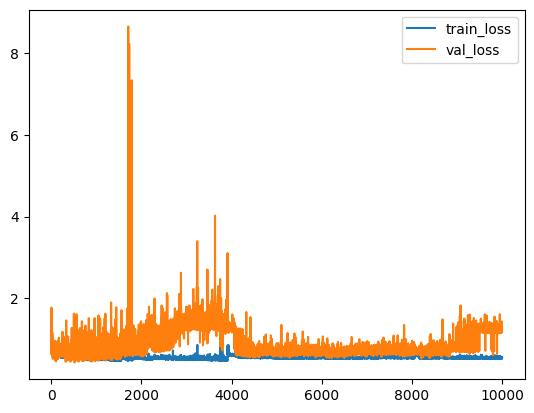

Model trained successfully!


In [4]:
pytorch_model = classifier.Net()
trainer = classifier.TrainModelPipeline(pytorch_model, lr=0.01)
trainer.train(dataloader_train, dataloader_val, num_epochs=10000)

Epoch 1/10000, Loss: 0.5693, Accuracy: 0.7313%
Epoch 101/10000, Loss: 0.4952, Accuracy: 0.7547%
Epoch 201/10000, Loss: 0.5268, Accuracy: 0.7523%
Epoch 301/10000, Loss: 0.5172, Accuracy: 0.7266%
Epoch 401/10000, Loss: 0.4980, Accuracy: 0.7430%
Epoch 501/10000, Loss: 0.4796, Accuracy: 0.7500%
Epoch 601/10000, Loss: 0.4980, Accuracy: 0.7477%
Epoch 701/10000, Loss: 0.5599, Accuracy: 0.7360%
Epoch 801/10000, Loss: 0.5319, Accuracy: 0.7383%
Epoch 901/10000, Loss: 0.4944, Accuracy: 0.7196%
Epoch 1001/10000, Loss: 0.5150, Accuracy: 0.7430%
Epoch 1101/10000, Loss: 0.5013, Accuracy: 0.7453%
Epoch 1201/10000, Loss: 0.5314, Accuracy: 0.7243%
Epoch 1301/10000, Loss: 0.5312, Accuracy: 0.7477%
Epoch 1401/10000, Loss: 0.5487, Accuracy: 0.7290%
Epoch 1501/10000, Loss: 0.5560, Accuracy: 0.7243%
Epoch 1601/10000, Loss: 0.5331, Accuracy: 0.7220%
Epoch 1701/10000, Loss: 0.5266, Accuracy: 0.7266%
Epoch 1801/10000, Loss: 0.5380, Accuracy: 0.7523%
Epoch 1901/10000, Loss: 0.5279, Accuracy: 0.7430%
Epoch 2001/1

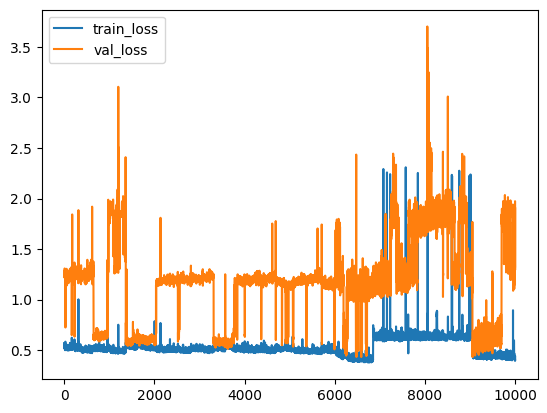

Model trained successfully!


In [5]:
trainer1 = classifier.TrainModelPipeline(pytorch_model, lr=0.005, optimization_type="Adam")
trainer1.train(dataloader_train, dataloader_val, num_epochs=10000)

Epoch 1/1000, Loss: 1.0117, Accuracy: 0.6308%
Epoch 101/1000, Loss: 0.6879, Accuracy: 0.5234%
Epoch 201/1000, Loss: 0.6835, Accuracy: 0.5117%
Epoch 301/1000, Loss: 0.6837, Accuracy: 0.4930%
Epoch 401/1000, Loss: 0.6869, Accuracy: 0.5070%
Epoch 501/1000, Loss: 0.6883, Accuracy: 0.5070%
Epoch 601/1000, Loss: 0.6849, Accuracy: 0.5117%
Epoch 701/1000, Loss: 0.6900, Accuracy: 0.5070%
Epoch 801/1000, Loss: 0.6886, Accuracy: 0.4883%
Epoch 901/1000, Loss: 0.6890, Accuracy: 0.4579%


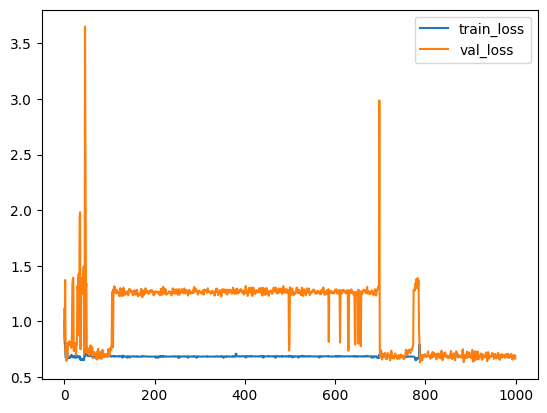

Model trained successfully!


In [6]:
trainer2 = classifier.TrainModelPipeline(pytorch_model, lr=0.005, momentum=0.95)
trainer2.train(dataloader_train, dataloader_val, num_epochs=1000)

In [15]:
# Grid search parameters
values = []
import numpy as np
for idx in range(10):

	# Randomly sample a learning rate factor between 2 and 4
	factor = np.random.uniform(1,4)
	lr = 10 ** -factor
	
	# Randomly select a momentum between 0.85 and 0.99
	momentum = np.random.uniform(0.85,0.99)
	values.append((lr, momentum))

In [16]:
values

[(0.08763733439382651, 0.9553747888127797),
 (0.0001292048120653887, 0.8630481792297751),
 (0.00025034865629221703, 0.9230603861905182),
 (0.0018436095972813116, 0.9434644042068513),
 (0.006100723735650655, 0.9381512890472266),
 (0.007317359183816534, 0.9655575866608108),
 (0.0005284854607264538, 0.9315231843299806),
 (0.0006525887519378066, 0.8791555369388576),
 (0.011702798208579265, 0.9320599089780844),
 (0.04061960697645275, 0.9763097449791596)]

Epoch 1/2000, Loss: 1.7332, Accuracy: 0.5093%
Epoch 101/2000, Loss: 0.7599, Accuracy: 0.4579%
Epoch 201/2000, Loss: 0.7445, Accuracy: 0.5491%
Epoch 301/2000, Loss: 0.7131, Accuracy: 0.4743%
Epoch 401/2000, Loss: 0.6973, Accuracy: 0.4790%
Epoch 501/2000, Loss: 0.7464, Accuracy: 0.4766%
Epoch 601/2000, Loss: 0.7118, Accuracy: 0.4813%
Epoch 701/2000, Loss: 0.7148, Accuracy: 0.4836%
Epoch 801/2000, Loss: 0.7576, Accuracy: 0.4860%
Epoch 901/2000, Loss: 0.7146, Accuracy: 0.4626%
Epoch 1001/2000, Loss: 0.7058, Accuracy: 0.4977%
Epoch 1101/2000, Loss: 0.7330, Accuracy: 0.4977%
Epoch 1201/2000, Loss: 0.8163, Accuracy: 0.4603%
Epoch 1301/2000, Loss: 0.9069, Accuracy: 0.5023%
Epoch 1401/2000, Loss: 0.6940, Accuracy: 0.5280%
Epoch 1501/2000, Loss: 0.7445, Accuracy: 0.4790%
Epoch 1601/2000, Loss: 0.7762, Accuracy: 0.5140%
Epoch 1701/2000, Loss: 0.7374, Accuracy: 0.5000%
Epoch 1801/2000, Loss: 0.7133, Accuracy: 0.5327%
Epoch 1901/2000, Loss: 0.7329, Accuracy: 0.5210%


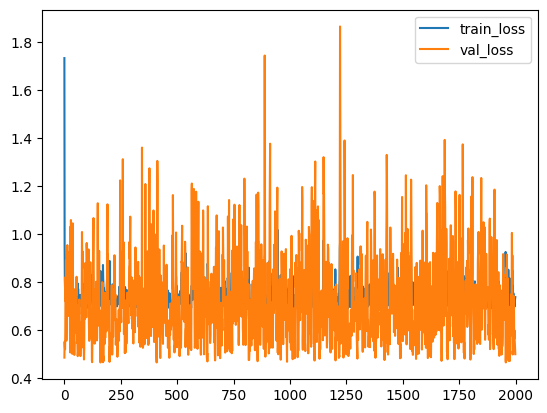

Model trained successfully!
Evaluation step
Sample size: 170
Loss: 0.5003427863121033, Accuracy: 0.8235%
Epoch 1/2000, Loss: 1.3014, Accuracy: 0.4486%
Epoch 101/2000, Loss: 0.6281, Accuracy: 0.6636%
Epoch 201/2000, Loss: 0.5876, Accuracy: 0.6893%
Epoch 301/2000, Loss: 0.5969, Accuracy: 0.7033%
Epoch 401/2000, Loss: 0.5586, Accuracy: 0.7173%
Epoch 501/2000, Loss: 0.5834, Accuracy: 0.7407%
Epoch 601/2000, Loss: 0.5554, Accuracy: 0.7220%
Epoch 701/2000, Loss: 0.5454, Accuracy: 0.7336%
Epoch 801/2000, Loss: 0.5264, Accuracy: 0.7547%
Epoch 901/2000, Loss: 0.5157, Accuracy: 0.7664%
Epoch 1001/2000, Loss: 0.5168, Accuracy: 0.7664%
Epoch 1101/2000, Loss: 0.5303, Accuracy: 0.7850%
Epoch 1201/2000, Loss: 0.4815, Accuracy: 0.7874%
Epoch 1301/2000, Loss: 0.4792, Accuracy: 0.7734%
Epoch 1401/2000, Loss: 0.4847, Accuracy: 0.7991%
Epoch 1501/2000, Loss: 0.4853, Accuracy: 0.8084%
Epoch 1601/2000, Loss: 0.4637, Accuracy: 0.7804%
Epoch 1701/2000, Loss: 0.4884, Accuracy: 0.8037%
Epoch 1801/2000, Loss: 0.

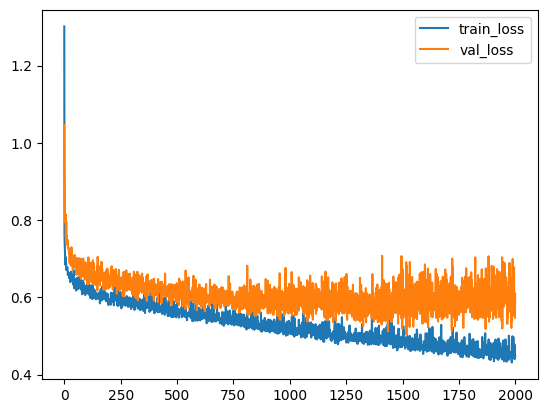

Model trained successfully!
Evaluation step
Sample size: 170
Loss: 0.6091504096984863, Accuracy: 0.7059%
Epoch 1/2000, Loss: 0.7556, Accuracy: 0.4650%
Epoch 101/2000, Loss: 0.5777, Accuracy: 0.6893%
Epoch 201/2000, Loss: 0.5724, Accuracy: 0.7126%
Epoch 301/2000, Loss: 0.5519, Accuracy: 0.7126%
Epoch 401/2000, Loss: 0.5335, Accuracy: 0.7313%
Epoch 501/2000, Loss: 0.5158, Accuracy: 0.7336%
Epoch 601/2000, Loss: 0.5059, Accuracy: 0.7383%
Epoch 701/2000, Loss: 0.4992, Accuracy: 0.7477%
Epoch 801/2000, Loss: 0.4864, Accuracy: 0.7664%
Epoch 901/2000, Loss: 0.4997, Accuracy: 0.7593%
Epoch 1001/2000, Loss: 0.4821, Accuracy: 0.7757%
Epoch 1101/2000, Loss: 0.5054, Accuracy: 0.7570%
Epoch 1201/2000, Loss: 0.4605, Accuracy: 0.7780%
Epoch 1301/2000, Loss: 0.4559, Accuracy: 0.7921%
Epoch 1401/2000, Loss: 0.4516, Accuracy: 0.7944%
Epoch 1501/2000, Loss: 0.4381, Accuracy: 0.7874%
Epoch 1601/2000, Loss: 0.4511, Accuracy: 0.7804%
Epoch 1701/2000, Loss: 0.4579, Accuracy: 0.7944%
Epoch 1801/2000, Loss: 0.

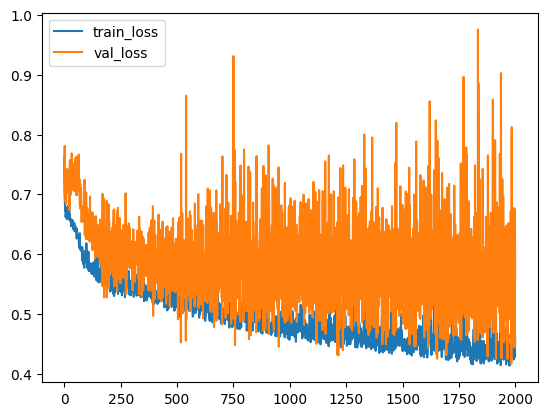

Model trained successfully!
Evaluation step
Sample size: 170
Loss: 0.5578851103782654, Accuracy: 0.7353%
Epoch 1/2000, Loss: 0.9195, Accuracy: 0.5070%
Epoch 101/2000, Loss: 0.6105, Accuracy: 0.7150%
Epoch 201/2000, Loss: 0.6932, Accuracy: 0.6121%
Epoch 301/2000, Loss: 0.6900, Accuracy: 0.5047%
Epoch 401/2000, Loss: 0.6902, Accuracy: 0.5000%
Epoch 501/2000, Loss: 0.6902, Accuracy: 0.5000%
Epoch 601/2000, Loss: 0.6876, Accuracy: 0.5047%
Epoch 701/2000, Loss: 0.6871, Accuracy: 0.5047%
Epoch 801/2000, Loss: 0.6865, Accuracy: 0.4977%
Epoch 901/2000, Loss: 0.6872, Accuracy: 0.4766%
Epoch 1001/2000, Loss: 0.6872, Accuracy: 0.5047%
Epoch 1101/2000, Loss: 0.6876, Accuracy: 0.4696%
Epoch 1201/2000, Loss: 0.6879, Accuracy: 0.5047%
Epoch 1301/2000, Loss: 0.6872, Accuracy: 0.5000%
Epoch 1401/2000, Loss: 0.6869, Accuracy: 0.5047%
Epoch 1501/2000, Loss: 0.6872, Accuracy: 0.5047%
Epoch 1601/2000, Loss: 0.6876, Accuracy: 0.4766%
Epoch 1701/2000, Loss: 0.6873, Accuracy: 0.5047%
Epoch 1801/2000, Loss: 0.

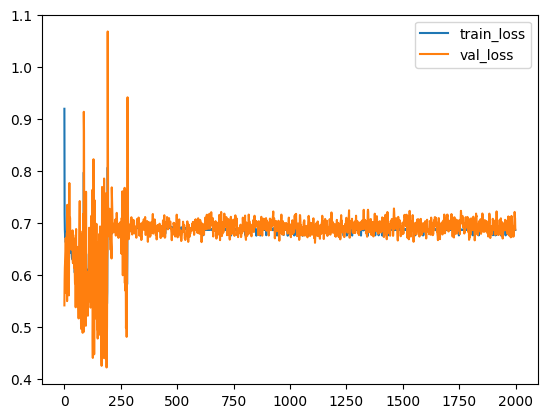

Model trained successfully!
Evaluation step
Sample size: 170
Loss: 0.6875160932540894, Accuracy: 0.8176%
Epoch 1/2000, Loss: 0.8259, Accuracy: 0.5140%
Epoch 101/2000, Loss: 0.6938, Accuracy: 0.5000%
Epoch 201/2000, Loss: 0.6936, Accuracy: 0.5000%
Epoch 301/2000, Loss: 0.6940, Accuracy: 0.5000%
Epoch 401/2000, Loss: 0.6934, Accuracy: 0.5000%
Epoch 501/2000, Loss: 0.6944, Accuracy: 0.5000%
Epoch 601/2000, Loss: 0.6951, Accuracy: 0.5000%
Epoch 701/2000, Loss: 0.6927, Accuracy: 0.5000%
Epoch 801/2000, Loss: 0.6949, Accuracy: 0.5000%
Epoch 901/2000, Loss: 0.6944, Accuracy: 0.4907%
Epoch 1001/2000, Loss: 0.6945, Accuracy: 0.5000%
Epoch 1101/2000, Loss: 0.6946, Accuracy: 0.5000%
Epoch 1201/2000, Loss: 0.6965, Accuracy: 0.5000%
Epoch 1301/2000, Loss: 0.6970, Accuracy: 0.5000%
Epoch 1401/2000, Loss: 0.6932, Accuracy: 0.5000%
Epoch 1501/2000, Loss: 0.6945, Accuracy: 0.5000%
Epoch 1601/2000, Loss: 0.6939, Accuracy: 0.5000%
Epoch 1701/2000, Loss: 0.6931, Accuracy: 0.5070%
Epoch 1801/2000, Loss: 0.

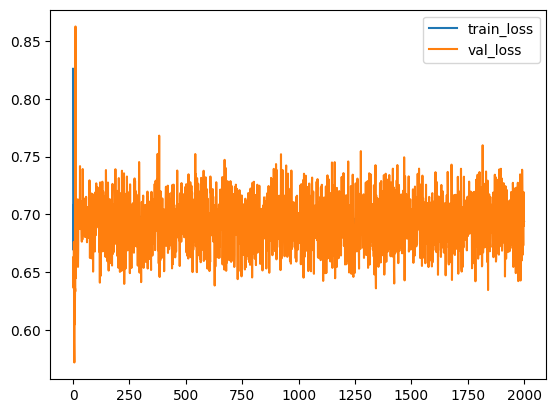

Model trained successfully!
Evaluation step
Sample size: 170
Loss: 0.6902668476104736, Accuracy: 0.8235%
Epoch 1/2000, Loss: 0.7313, Accuracy: 0.5257%
Epoch 101/2000, Loss: 0.6944, Accuracy: 0.4953%
Epoch 201/2000, Loss: 0.6939, Accuracy: 0.4836%
Epoch 301/2000, Loss: 0.6919, Accuracy: 0.5000%
Epoch 401/2000, Loss: 0.6933, Accuracy: 0.4930%
Epoch 501/2000, Loss: 0.6938, Accuracy: 0.4977%
Epoch 601/2000, Loss: 0.6925, Accuracy: 0.5023%
Epoch 701/2000, Loss: 0.6974, Accuracy: 0.5000%
Epoch 801/2000, Loss: 0.6927, Accuracy: 0.4883%
Epoch 901/2000, Loss: 0.6930, Accuracy: 0.5047%
Epoch 1001/2000, Loss: 0.6942, Accuracy: 0.5000%
Epoch 1101/2000, Loss: 0.6936, Accuracy: 0.5000%
Epoch 1201/2000, Loss: 0.6941, Accuracy: 0.4509%
Epoch 1301/2000, Loss: 0.6953, Accuracy: 0.5187%
Epoch 1401/2000, Loss: 0.6974, Accuracy: 0.5000%
Epoch 1501/2000, Loss: 0.6961, Accuracy: 0.4813%
Epoch 1601/2000, Loss: 0.6931, Accuracy: 0.5023%
Epoch 1701/2000, Loss: 0.6961, Accuracy: 0.5000%
Epoch 1801/2000, Loss: 0.

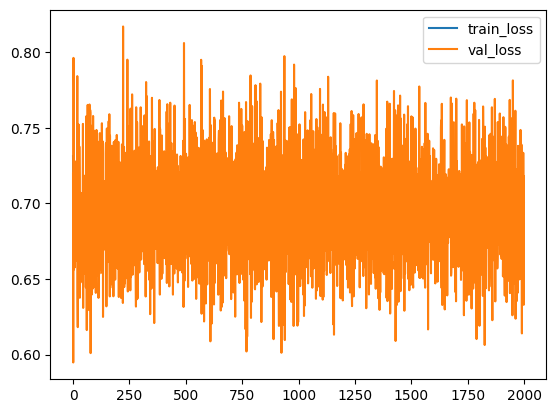

Model trained successfully!
Evaluation step
Sample size: 170
Loss: 0.7177668809890747, Accuracy: 0.1765%
Epoch 1/2000, Loss: 1.8550, Accuracy: 0.5304%
Epoch 101/2000, Loss: 0.6552, Accuracy: 0.6776%
Epoch 201/2000, Loss: 0.5980, Accuracy: 0.6916%
Epoch 301/2000, Loss: 0.5752, Accuracy: 0.6986%
Epoch 401/2000, Loss: 0.5053, Accuracy: 0.7640%
Epoch 501/2000, Loss: 0.4604, Accuracy: 0.7780%
Epoch 601/2000, Loss: 0.5114, Accuracy: 0.7407%
Epoch 701/2000, Loss: 0.4574, Accuracy: 0.8061%
Epoch 801/2000, Loss: 0.6715, Accuracy: 0.6425%
Epoch 901/2000, Loss: 0.4395, Accuracy: 0.7874%
Epoch 1001/2000, Loss: 0.4277, Accuracy: 0.8037%
Epoch 1101/2000, Loss: 0.4361, Accuracy: 0.8037%
Epoch 1201/2000, Loss: 0.4424, Accuracy: 0.7991%
Epoch 1301/2000, Loss: 0.4412, Accuracy: 0.7780%
Epoch 1401/2000, Loss: 0.4708, Accuracy: 0.7897%
Epoch 1501/2000, Loss: 0.3694, Accuracy: 0.8388%
Epoch 1601/2000, Loss: 0.4436, Accuracy: 0.8061%
Epoch 1701/2000, Loss: 0.3708, Accuracy: 0.8458%
Epoch 1801/2000, Loss: 0.

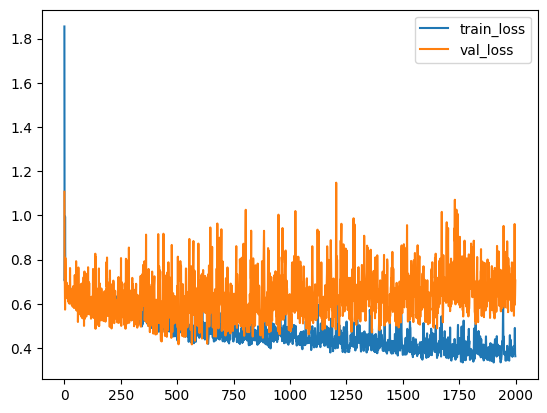

Model trained successfully!
Evaluation step
Sample size: 170
Loss: 0.7060359716415405, Accuracy: 0.7294%
Epoch 1/2000, Loss: 1.2077, Accuracy: 0.5070%
Epoch 101/2000, Loss: 0.6263, Accuracy: 0.6565%
Epoch 201/2000, Loss: 0.6227, Accuracy: 0.6752%
Epoch 301/2000, Loss: 0.6149, Accuracy: 0.6916%
Epoch 401/2000, Loss: 0.5720, Accuracy: 0.7103%
Epoch 501/2000, Loss: 0.5579, Accuracy: 0.7196%
Epoch 601/2000, Loss: 0.5314, Accuracy: 0.7593%
Epoch 701/2000, Loss: 0.4759, Accuracy: 0.7757%
Epoch 801/2000, Loss: 0.4526, Accuracy: 0.7827%
Epoch 901/2000, Loss: 0.4763, Accuracy: 0.7874%
Epoch 1001/2000, Loss: 0.4681, Accuracy: 0.7664%
Epoch 1101/2000, Loss: 0.4242, Accuracy: 0.8061%
Epoch 1201/2000, Loss: 0.4414, Accuracy: 0.7850%
Epoch 1301/2000, Loss: 0.4186, Accuracy: 0.7804%
Epoch 1401/2000, Loss: 0.4200, Accuracy: 0.8154%
Epoch 1501/2000, Loss: 0.3921, Accuracy: 0.8154%
Epoch 1601/2000, Loss: 0.4075, Accuracy: 0.8248%
Epoch 1701/2000, Loss: 0.4497, Accuracy: 0.8318%
Epoch 1801/2000, Loss: 0.

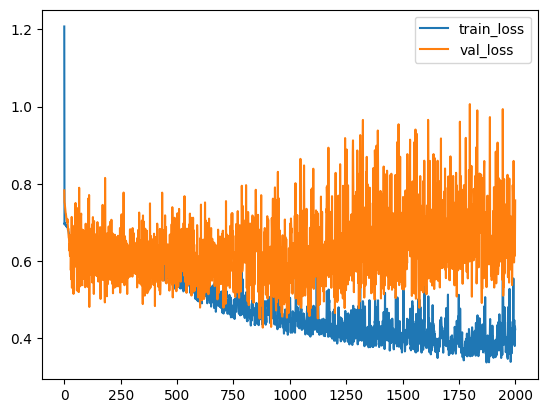

Model trained successfully!
Evaluation step
Sample size: 170
Loss: 0.7571420073509216, Accuracy: 0.6588%
Epoch 1/2000, Loss: 0.7064, Accuracy: 0.4696%
Epoch 101/2000, Loss: 0.6949, Accuracy: 0.4743%
Epoch 201/2000, Loss: 0.7027, Accuracy: 0.4579%
Epoch 301/2000, Loss: 0.6955, Accuracy: 0.5000%
Epoch 401/2000, Loss: 0.6960, Accuracy: 0.4883%
Epoch 501/2000, Loss: 0.6928, Accuracy: 0.5140%
Epoch 601/2000, Loss: 0.6957, Accuracy: 0.5000%
Epoch 701/2000, Loss: 0.6932, Accuracy: 0.4953%
Epoch 801/2000, Loss: 0.6944, Accuracy: 0.5000%
Epoch 901/2000, Loss: 0.6959, Accuracy: 0.5000%
Epoch 1001/2000, Loss: 0.6942, Accuracy: 0.4439%
Epoch 1101/2000, Loss: 0.6954, Accuracy: 0.4603%
Epoch 1201/2000, Loss: 0.6961, Accuracy: 0.5000%
Epoch 1301/2000, Loss: 0.6952, Accuracy: 0.4766%
Epoch 1401/2000, Loss: 0.6992, Accuracy: 0.5000%
Epoch 1501/2000, Loss: 0.6938, Accuracy: 0.4977%
Epoch 1601/2000, Loss: 0.6933, Accuracy: 0.5023%
Epoch 1701/2000, Loss: 0.6944, Accuracy: 0.4556%
Epoch 1801/2000, Loss: 0.

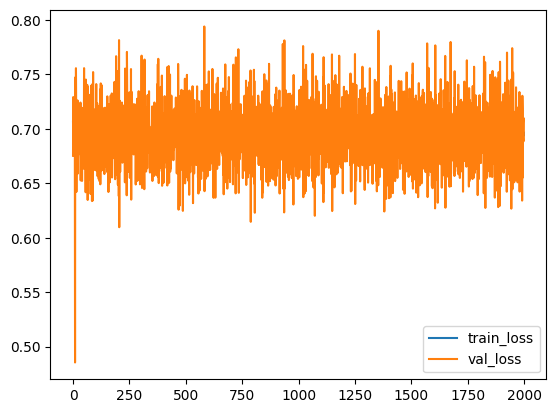

Model trained successfully!
Evaluation step
Sample size: 170
Loss: 0.7093988656997681, Accuracy: 0.1765%
Epoch 1/2000, Loss: 9.7012, Accuracy: 0.5000%
Epoch 101/2000, Loss: 0.7193, Accuracy: 0.4977%
Epoch 201/2000, Loss: 0.7090, Accuracy: 0.5164%
Epoch 301/2000, Loss: 0.7116, Accuracy: 0.4860%
Epoch 401/2000, Loss: 0.7237, Accuracy: 0.4930%
Epoch 501/2000, Loss: 0.6992, Accuracy: 0.4696%
Epoch 601/2000, Loss: 0.7075, Accuracy: 0.5187%
Epoch 701/2000, Loss: 0.7363, Accuracy: 0.5000%
Epoch 801/2000, Loss: 0.7192, Accuracy: 0.4509%
Epoch 901/2000, Loss: 0.7037, Accuracy: 0.4860%
Epoch 1001/2000, Loss: 0.7260, Accuracy: 0.4696%
Epoch 1101/2000, Loss: 0.6978, Accuracy: 0.5000%
Epoch 1201/2000, Loss: 0.7027, Accuracy: 0.5187%
Epoch 1301/2000, Loss: 0.7112, Accuracy: 0.4556%
Epoch 1401/2000, Loss: 0.7153, Accuracy: 0.4743%
Epoch 1501/2000, Loss: 0.6956, Accuracy: 0.5070%
Epoch 1601/2000, Loss: 0.7000, Accuracy: 0.4790%
Epoch 1701/2000, Loss: 0.7086, Accuracy: 0.4813%
Epoch 1801/2000, Loss: 0.

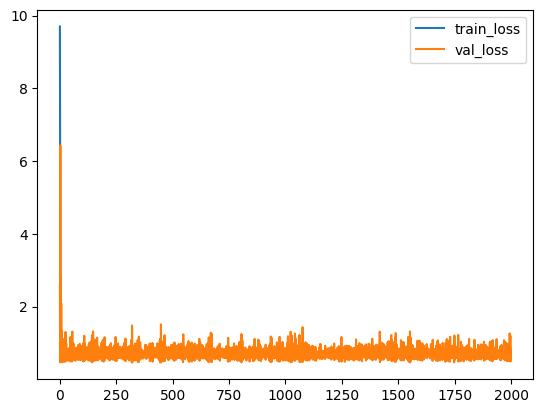

Model trained successfully!
Evaluation step
Sample size: 170
Loss: 1.1767621040344238, Accuracy: 0.1765%


In [17]:
eval_results = []
for val_tup in values:
	pytorch_model = classifier.Net()
	trainer3 = classifier.TrainModelPipeline(pytorch_model, lr=val_tup[0], momentum=val_tup[1])
	trainer3.train(dataloader_train, dataloader_val, num_epochs=2000)
	eval_loss, eval_accuracy = trainer3.evaluate(dataloader_val)
	
	
	eval_results.append((val_tup[0], val_tup[1], eval_loss, eval_accuracy))
		  

In [18]:
eval_results

[(0.08763733439382651,
  0.9553747888127797,
  0.5003427863121033,
  0.8235294222831726),
 (0.0001292048120653887,
  0.8630481792297751,
  0.6091504096984863,
  0.7058823704719543),
 (0.00025034865629221703,
  0.9230603861905182,
  0.5578851103782654,
  0.7352941036224365),
 (0.0018436095972813116,
  0.9434644042068513,
  0.6875160932540894,
  0.8176470398902893),
 (0.006100723735650655,
  0.9381512890472266,
  0.6902668476104736,
  0.8235294222831726),
 (0.007317359183816534,
  0.9655575866608108,
  0.7177668809890747,
  0.1764705926179886),
 (0.0005284854607264538,
  0.9315231843299806,
  0.7060359716415405,
  0.729411780834198),
 (0.0006525887519378066,
  0.8791555369388576,
  0.7571420073509216,
  0.658823549747467),
 (0.011702798208579265,
  0.9320599089780844,
  0.7093988656997681,
  0.1764705926179886),
 (0.04061960697645275,
  0.9763097449791596,
  1.1767621040344238,
  0.1764705926179886)]

In [19]:
sorted(eval_results, key=lambda x: x[3], reverse=True)

[(0.08763733439382651,
  0.9553747888127797,
  0.5003427863121033,
  0.8235294222831726),
 (0.006100723735650655,
  0.9381512890472266,
  0.6902668476104736,
  0.8235294222831726),
 (0.0018436095972813116,
  0.9434644042068513,
  0.6875160932540894,
  0.8176470398902893),
 (0.00025034865629221703,
  0.9230603861905182,
  0.5578851103782654,
  0.7352941036224365),
 (0.0005284854607264538,
  0.9315231843299806,
  0.7060359716415405,
  0.729411780834198),
 (0.0001292048120653887,
  0.8630481792297751,
  0.6091504096984863,
  0.7058823704719543),
 (0.0006525887519378066,
  0.8791555369388576,
  0.7571420073509216,
  0.658823549747467),
 (0.007317359183816534,
  0.9655575866608108,
  0.7177668809890747,
  0.1764705926179886),
 (0.011702798208579265,
  0.9320599089780844,
  0.7093988656997681,
  0.1764705926179886),
 (0.04061960697645275,
  0.9763097449791596,
  1.1767621040344238,
  0.1764705926179886)]

In [20]:
sorted(eval_results, key=lambda x: x[2])

[(0.08763733439382651,
  0.9553747888127797,
  0.5003427863121033,
  0.8235294222831726),
 (0.00025034865629221703,
  0.9230603861905182,
  0.5578851103782654,
  0.7352941036224365),
 (0.0001292048120653887,
  0.8630481792297751,
  0.6091504096984863,
  0.7058823704719543),
 (0.0018436095972813116,
  0.9434644042068513,
  0.6875160932540894,
  0.8176470398902893),
 (0.006100723735650655,
  0.9381512890472266,
  0.6902668476104736,
  0.8235294222831726),
 (0.0005284854607264538,
  0.9315231843299806,
  0.7060359716415405,
  0.729411780834198),
 (0.011702798208579265,
  0.9320599089780844,
  0.7093988656997681,
  0.1764705926179886),
 (0.007317359183816534,
  0.9655575866608108,
  0.7177668809890747,
  0.1764705926179886),
 (0.0006525887519378066,
  0.8791555369388576,
  0.7571420073509216,
  0.658823549747467),
 (0.04061960697645275,
  0.9763097449791596,
  1.1767621040344238,
  0.1764705926179886)]

Epoch 1/10000, Loss: 2.3687, Accuracy: 0.4836%
Epoch 101/10000, Loss: 0.7233, Accuracy: 0.4907%
Epoch 201/10000, Loss: 0.7922, Accuracy: 0.4953%
Epoch 301/10000, Loss: 0.7139, Accuracy: 0.4720%
Epoch 401/10000, Loss: 0.7025, Accuracy: 0.4626%
Epoch 501/10000, Loss: 0.7226, Accuracy: 0.4977%
Epoch 601/10000, Loss: 0.7017, Accuracy: 0.5280%
Epoch 701/10000, Loss: 0.7001, Accuracy: 0.4883%
Epoch 801/10000, Loss: 0.7378, Accuracy: 0.4673%
Epoch 901/10000, Loss: 0.7232, Accuracy: 0.5234%
Epoch 1001/10000, Loss: 0.7826, Accuracy: 0.5350%
Epoch 1101/10000, Loss: 0.7075, Accuracy: 0.4813%
Epoch 1201/10000, Loss: 0.7672, Accuracy: 0.5164%
Epoch 1301/10000, Loss: 0.6920, Accuracy: 0.5210%
Epoch 1401/10000, Loss: 0.7095, Accuracy: 0.5327%
Epoch 1501/10000, Loss: 0.7034, Accuracy: 0.5164%
Epoch 1601/10000, Loss: 0.7033, Accuracy: 0.4533%
Epoch 1701/10000, Loss: 0.7704, Accuracy: 0.5304%
Epoch 1801/10000, Loss: 0.7503, Accuracy: 0.4930%
Epoch 1901/10000, Loss: 0.7519, Accuracy: 0.5164%
Epoch 2001/1

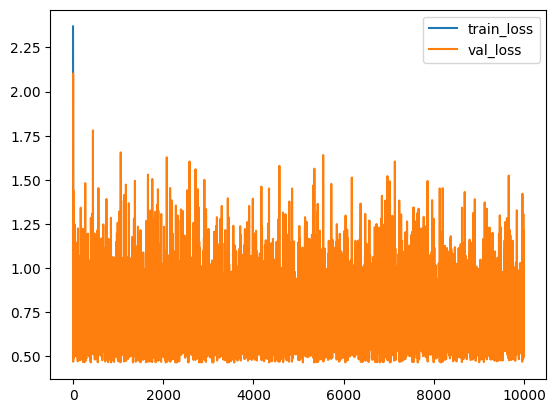

Model trained successfully!


In [22]:
pytorch_model = classifier.Net()
trainer4 = classifier.TrainModelPipeline(pytorch_model, lr=0.08, momentum=0.96)
trainer4.train(dataloader_train, dataloader_val, num_epochs=10000)

Epoch 1/10000, Loss: 0.9104, Accuracy: 0.5000%
Epoch 101/10000, Loss: 0.6608, Accuracy: 0.6262%
Epoch 201/10000, Loss: 0.6391, Accuracy: 0.6379%
Epoch 301/10000, Loss: 0.6038, Accuracy: 0.6542%
Epoch 401/10000, Loss: 0.6068, Accuracy: 0.6752%
Epoch 501/10000, Loss: 0.5828, Accuracy: 0.6822%
Epoch 601/10000, Loss: 0.5809, Accuracy: 0.6939%
Epoch 701/10000, Loss: 0.5864, Accuracy: 0.6682%
Epoch 801/10000, Loss: 0.5725, Accuracy: 0.6869%
Epoch 901/10000, Loss: 0.5716, Accuracy: 0.6939%
Epoch 1001/10000, Loss: 0.5517, Accuracy: 0.7173%
Epoch 1101/10000, Loss: 0.5405, Accuracy: 0.7103%
Epoch 1201/10000, Loss: 0.5445, Accuracy: 0.7196%
Epoch 1301/10000, Loss: 0.5302, Accuracy: 0.7196%
Epoch 1401/10000, Loss: 0.5314, Accuracy: 0.7453%
Epoch 1501/10000, Loss: 0.5549, Accuracy: 0.7523%
Epoch 1601/10000, Loss: 0.5416, Accuracy: 0.7430%
Epoch 1701/10000, Loss: 0.5373, Accuracy: 0.7383%
Epoch 1801/10000, Loss: 0.5213, Accuracy: 0.7383%
Epoch 1901/10000, Loss: 0.5109, Accuracy: 0.7383%
Epoch 2001/1

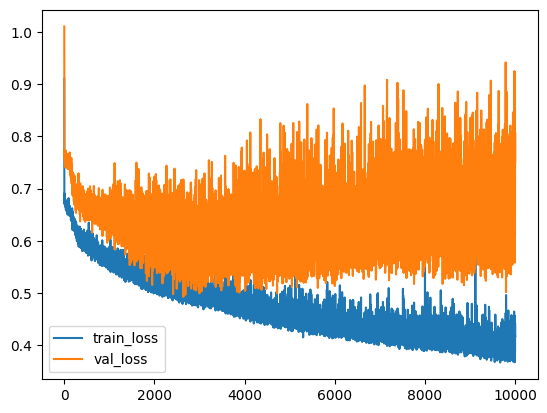

Model trained successfully!


In [23]:
pytorch_model = classifier.Net()
trainer5 = classifier.TrainModelPipeline(pytorch_model, lr=0.0001, momentum=0.86)
trainer5.train(dataloader_train, dataloader_val, num_epochs=10000)

In [50]:
print(trainer5.evaluate(dataloader_val))

Evaluation step
Sample size: 170
Loss: 0.7505809664726257, Accuracy: 0.6647%
(0.7505809664726257, 0.6647058725357056)


Epoch 1/3000, Loss: 1.2721, Accuracy: 0.4836%
Epoch 101/3000, Loss: 0.6567, Accuracy: 0.6215%
Epoch 201/3000, Loss: 0.6308, Accuracy: 0.6542%
Epoch 301/3000, Loss: 0.6497, Accuracy: 0.6752%
Epoch 401/3000, Loss: 0.6040, Accuracy: 0.6799%
Epoch 501/3000, Loss: 0.6076, Accuracy: 0.6963%
Epoch 601/3000, Loss: 0.5802, Accuracy: 0.7009%
Epoch 701/3000, Loss: 0.5838, Accuracy: 0.7079%
Epoch 801/3000, Loss: 0.5822, Accuracy: 0.7056%
Epoch 901/3000, Loss: 0.5768, Accuracy: 0.7196%
Epoch 1001/3000, Loss: 0.5766, Accuracy: 0.7103%
Epoch 1101/3000, Loss: 0.5749, Accuracy: 0.7220%
Epoch 1201/3000, Loss: 0.5911, Accuracy: 0.7290%
Epoch 1301/3000, Loss: 0.5459, Accuracy: 0.7453%
Epoch 1401/3000, Loss: 0.5363, Accuracy: 0.7477%
Epoch 1501/3000, Loss: 0.5588, Accuracy: 0.7710%
Epoch 1601/3000, Loss: 0.5437, Accuracy: 0.7430%
Epoch 1701/3000, Loss: 0.5249, Accuracy: 0.7500%
Epoch 1801/3000, Loss: 0.5320, Accuracy: 0.7640%
Epoch 1901/3000, Loss: 0.5382, Accuracy: 0.7477%
Epoch 2001/3000, Loss: 0.5008, A

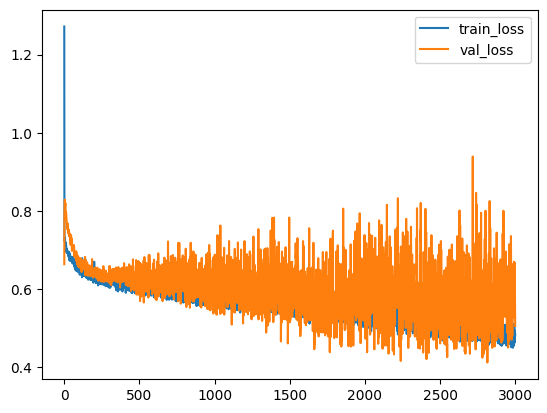

Model trained successfully!


In [29]:
pytorch_model = classifier.Net()
trainer5_1 = classifier.TrainModelPipeline(pytorch_model, lr=0.0001, momentum=0.86)
trainer5_1.train(dataloader_train, dataloader_val, num_epochs=3000)

In [30]:
trainer5_1.evaluate(dataloader_val)

Evaluation step
Sample size: 170
Loss: 0.5050995349884033, Accuracy: 0.7353%


(0.5050995349884033, 0.7352941036224365)

Epoch 1/2900, Loss: 2.4933, Accuracy: 0.4860%
Epoch 101/2900, Loss: 0.6931, Accuracy: 0.5000%
Epoch 201/2900, Loss: 0.6931, Accuracy: 0.5000%
Epoch 301/2900, Loss: 0.6931, Accuracy: 0.5000%
Epoch 401/2900, Loss: 0.6936, Accuracy: 0.5000%
Epoch 501/2900, Loss: 0.6932, Accuracy: 0.5000%
Epoch 601/2900, Loss: 0.6932, Accuracy: 0.5000%
Epoch 701/2900, Loss: 0.6932, Accuracy: 0.4650%
Epoch 801/2900, Loss: 0.6931, Accuracy: 0.5000%
Epoch 901/2900, Loss: 0.6931, Accuracy: 0.5000%
Epoch 1001/2900, Loss: 0.6933, Accuracy: 0.5000%
Epoch 1101/2900, Loss: 0.6932, Accuracy: 0.5000%
Epoch 1201/2900, Loss: 0.6931, Accuracy: 0.5000%
Epoch 1301/2900, Loss: 0.6932, Accuracy: 0.4509%
Epoch 1401/2900, Loss: 0.6932, Accuracy: 0.5000%
Epoch 1501/2900, Loss: 0.6931, Accuracy: 0.5000%
Epoch 1601/2900, Loss: 0.6933, Accuracy: 0.5000%
Epoch 1701/2900, Loss: 0.6938, Accuracy: 0.5000%
Epoch 1801/2900, Loss: 0.6932, Accuracy: 0.5000%
Epoch 1901/2900, Loss: 0.6931, Accuracy: 0.5000%
Epoch 2001/2900, Loss: 0.6931, A

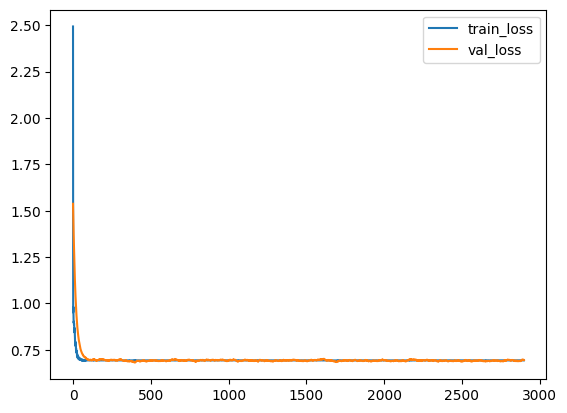

Model trained successfully!
Evaluation step
Sample size: 170
Loss: 0.6954486966133118, Accuracy: 0.1765%


(0.6954486966133118, 0.1764705926179886)

In [31]:
pytorch_model = classifier.Net()
trainer5_2 = classifier.TrainModelPipeline(pytorch_model, lr=0.0003, momentum=0.86)
trainer5_2.train(dataloader_train, dataloader_val, num_epochs=2900)
trainer5_2.evaluate(dataloader_val)

Epoch 1/2900, Loss: 1.4367, Accuracy: 0.4766%
Epoch 101/2900, Loss: 0.6437, Accuracy: 0.5678%
Epoch 201/2900, Loss: 0.6340, Accuracy: 0.5724%
Epoch 301/2900, Loss: 0.6433, Accuracy: 0.5794%
Epoch 401/2900, Loss: 0.6435, Accuracy: 0.6729%
Epoch 501/2900, Loss: 0.6176, Accuracy: 0.6916%
Epoch 601/2900, Loss: 0.6049, Accuracy: 0.6939%
Epoch 701/2900, Loss: 0.5769, Accuracy: 0.7009%
Epoch 801/2900, Loss: 0.6341, Accuracy: 0.6893%
Epoch 901/2900, Loss: 0.5677, Accuracy: 0.7173%
Epoch 1001/2900, Loss: 0.6045, Accuracy: 0.6612%
Epoch 1101/2900, Loss: 0.5497, Accuracy: 0.7150%
Epoch 1201/2900, Loss: 0.5385, Accuracy: 0.7407%
Epoch 1301/2900, Loss: 0.5266, Accuracy: 0.7290%
Epoch 1401/2900, Loss: 0.5285, Accuracy: 0.7360%
Epoch 1501/2900, Loss: 0.5390, Accuracy: 0.7196%
Epoch 1601/2900, Loss: 0.5343, Accuracy: 0.7383%
Epoch 1701/2900, Loss: 0.5203, Accuracy: 0.7617%
Epoch 1801/2900, Loss: 0.5398, Accuracy: 0.7290%
Epoch 1901/2900, Loss: 0.5136, Accuracy: 0.7570%
Epoch 2001/2900, Loss: 0.5101, A

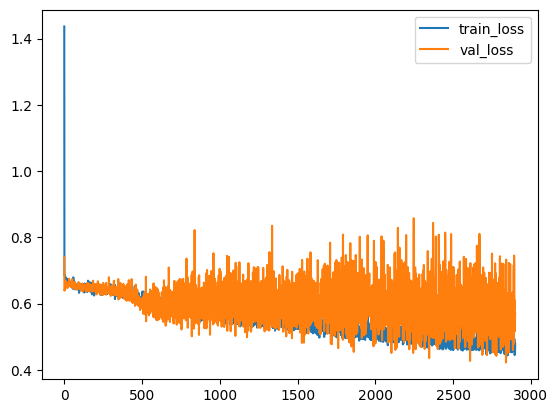

Model trained successfully!
Evaluation step
Sample size: 170
Loss: 0.5700014233589172, Accuracy: 0.6882%


(0.5700014233589172, 0.6882352828979492)

In [32]:
pytorch_model = classifier.Net()
trainer5_3 = classifier.TrainModelPipeline(pytorch_model, lr=0.0001, momentum=0.90)
trainer5_3.train(dataloader_train, dataloader_val, num_epochs=2900)
trainer5_3.evaluate(dataloader_val)

Epoch 1/2900, Loss: 5.0947, Accuracy: 0.5023%
Epoch 101/2900, Loss: 0.5643, Accuracy: 0.7056%
Epoch 201/2900, Loss: 0.5643, Accuracy: 0.7033%
Epoch 301/2900, Loss: 0.5327, Accuracy: 0.7220%
Epoch 401/2900, Loss: 0.5540, Accuracy: 0.7383%
Epoch 501/2900, Loss: 0.5335, Accuracy: 0.7500%
Epoch 601/2900, Loss: 0.5302, Accuracy: 0.7523%
Epoch 701/2900, Loss: 0.5348, Accuracy: 0.7453%
Epoch 801/2900, Loss: 0.5216, Accuracy: 0.7664%
Epoch 901/2900, Loss: 0.4975, Accuracy: 0.7710%
Epoch 1001/2900, Loss: 0.4922, Accuracy: 0.7804%
Epoch 1101/2900, Loss: 0.4793, Accuracy: 0.7757%
Epoch 1201/2900, Loss: 0.4860, Accuracy: 0.7780%
Epoch 1301/2900, Loss: 0.4868, Accuracy: 0.7850%
Epoch 1401/2900, Loss: 0.4746, Accuracy: 0.7780%
Epoch 1501/2900, Loss: 0.4888, Accuracy: 0.7850%
Epoch 1601/2900, Loss: 0.4669, Accuracy: 0.7897%
Epoch 1701/2900, Loss: 0.4522, Accuracy: 0.7804%
Epoch 1801/2900, Loss: 0.4589, Accuracy: 0.7804%
Epoch 1901/2900, Loss: 0.4661, Accuracy: 0.8178%
Epoch 2001/2900, Loss: 0.4409, A

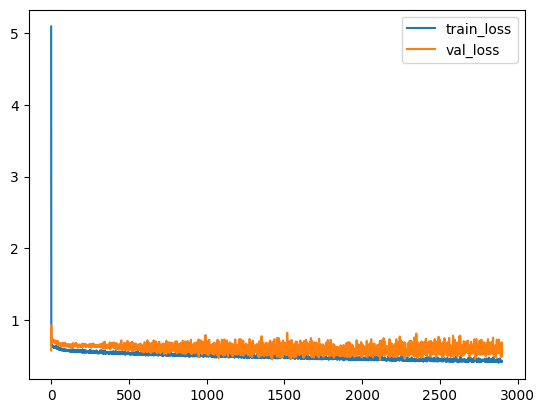

Model trained successfully!
Evaluation step
Sample size: 170
Loss: 0.5550805330276489, Accuracy: 0.7412%


(0.5550805330276489, 0.7411764860153198)

In [33]:
pytorch_model = classifier.Net()
trainer5_4 = classifier.TrainModelPipeline(pytorch_model, lr=0.0001, momentum=0.86, weight_decay=5e-4)
trainer5_4.train(dataloader_train, dataloader_val, num_epochs=2900)
trainer5_4.evaluate(dataloader_val)

In [34]:
trainer5_4.evaluate(dataloader_val)

Evaluation step
Sample size: 170
Loss: 0.5550805330276489, Accuracy: 0.7412%


(0.5550805330276489, 0.7411764860153198)

Epoch 1/2900, Loss: 1.2004, Accuracy: 0.4603%
Epoch 101/2900, Loss: 0.6664, Accuracy: 0.5444%
Epoch 201/2900, Loss: 0.6347, Accuracy: 0.5444%
Epoch 301/2900, Loss: 0.6111, Accuracy: 0.6869%
Epoch 401/2900, Loss: 0.6119, Accuracy: 0.6986%
Epoch 501/2900, Loss: 0.5818, Accuracy: 0.6986%
Epoch 601/2900, Loss: 0.5942, Accuracy: 0.7033%
Epoch 701/2900, Loss: 0.5831, Accuracy: 0.6893%
Epoch 801/2900, Loss: 0.5750, Accuracy: 0.7103%
Epoch 901/2900, Loss: 0.5877, Accuracy: 0.6986%
Epoch 1001/2900, Loss: 0.5547, Accuracy: 0.7079%
Epoch 1101/2900, Loss: 0.5652, Accuracy: 0.7150%
Epoch 1201/2900, Loss: 0.5471, Accuracy: 0.7196%
Epoch 1301/2900, Loss: 0.5501, Accuracy: 0.7056%
Epoch 1401/2900, Loss: 0.5533, Accuracy: 0.7336%
Epoch 1501/2900, Loss: 0.5322, Accuracy: 0.7150%
Epoch 1601/2900, Loss: 0.5383, Accuracy: 0.7430%
Epoch 1701/2900, Loss: 0.5370, Accuracy: 0.7266%
Epoch 1801/2900, Loss: 0.5234, Accuracy: 0.7407%
Epoch 1901/2900, Loss: 0.5276, Accuracy: 0.7523%
Epoch 2001/2900, Loss: 0.5300, A

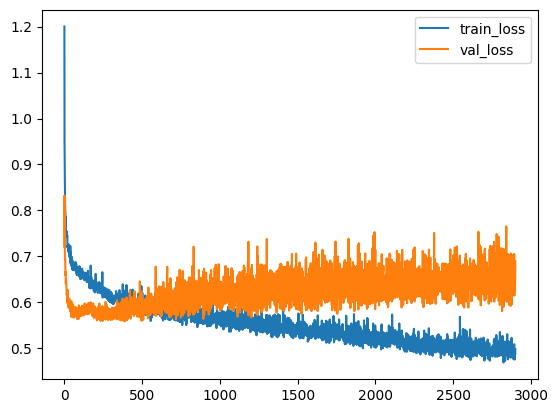

Model trained successfully!


In [35]:
pytorch_model = classifier.Net()
trainer5_5 = classifier.TrainModelPipeline(pytorch_model, lr=0.0001, momentum=0.86, weight_decay=1e-4)
trainer5_5.train(dataloader_train, dataloader_val, num_epochs=2900)

Epoch 1/1000, Loss: 0.6964, Accuracy: 0.5421%
Epoch 101/1000, Loss: 0.6794, Accuracy: 0.5631%
Epoch 201/1000, Loss: 0.6802, Accuracy: 0.5724%
Epoch 301/1000, Loss: 0.6857, Accuracy: 0.5771%
Epoch 401/1000, Loss: 0.6844, Accuracy: 0.5794%
Epoch 501/1000, Loss: 0.6818, Accuracy: 0.5841%
Epoch 601/1000, Loss: 0.6754, Accuracy: 0.5841%
Epoch 701/1000, Loss: 0.6768, Accuracy: 0.5864%
Epoch 801/1000, Loss: 0.6715, Accuracy: 0.5864%
Epoch 901/1000, Loss: 0.6728, Accuracy: 0.5888%


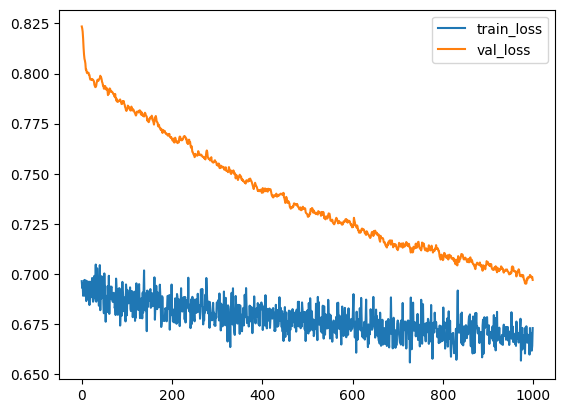

Model trained successfully!


In [36]:
pytorch_model = classifier.Net()
trainer5_6 = classifier.TrainModelPipeline(pytorch_model, lr=0.00001, momentum=0.86, weight_decay=1e-4)
trainer5_6.train(dataloader_train, dataloader_val, num_epochs=1000)

In [37]:
trainer5_6.evaluate(dataloader_val)

Evaluation step
Sample size: 170
Loss: 0.697010338306427, Accuracy: 0.4000%


(0.697010338306427, 0.4000000059604645)

Epoch 1/2500, Loss: 1.2571, Accuracy: 0.4953%
Epoch 101/2500, Loss: 0.6744, Accuracy: 0.5187%
Epoch 201/2500, Loss: 0.6499, Accuracy: 0.5280%
Epoch 301/2500, Loss: 0.6318, Accuracy: 0.6706%
Epoch 401/2500, Loss: 0.6269, Accuracy: 0.6706%
Epoch 501/2500, Loss: 0.6199, Accuracy: 0.6776%
Epoch 601/2500, Loss: 0.6088, Accuracy: 0.6822%
Epoch 701/2500, Loss: 0.5967, Accuracy: 0.6869%
Epoch 801/2500, Loss: 0.5895, Accuracy: 0.6869%
Epoch 901/2500, Loss: 0.5875, Accuracy: 0.6939%
Epoch 1001/2500, Loss: 0.5939, Accuracy: 0.6822%
Epoch 1101/2500, Loss: 0.5968, Accuracy: 0.6893%
Epoch 1201/2500, Loss: 0.5845, Accuracy: 0.6846%
Epoch 1301/2500, Loss: 0.5787, Accuracy: 0.6986%
Epoch 1401/2500, Loss: 0.5671, Accuracy: 0.6986%
Epoch 1501/2500, Loss: 0.5846, Accuracy: 0.7009%
Epoch 1601/2500, Loss: 0.5788, Accuracy: 0.7056%
Epoch 1701/2500, Loss: 0.5762, Accuracy: 0.6963%
Epoch 1801/2500, Loss: 0.5927, Accuracy: 0.6963%
Epoch 1901/2500, Loss: 0.5666, Accuracy: 0.7056%
Epoch 2001/2500, Loss: 0.5800, A

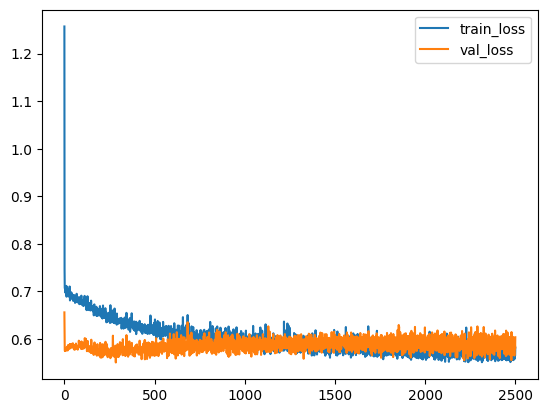

Model trained successfully!


In [38]:
pytorch_model = classifier.Net()
trainer5_6 = classifier.TrainModelPipeline(pytorch_model, lr=0.00005, momentum=0.86, weight_decay=1e-4)
trainer5_6.train(dataloader_train, dataloader_val, num_epochs=2500)

In [39]:
trainer5_6.evaluate(dataloader_val)

Evaluation step
Sample size: 170
Loss: 0.6034221649169922, Accuracy: 0.6118%


(0.6034221649169922, 0.6117647290229797)

Epoch 1/2500, Loss: 1.7116, Accuracy: 0.5234%
Epoch 101/2500, Loss: 0.6320, Accuracy: 0.6472%
Epoch 201/2500, Loss: 0.6168, Accuracy: 0.6542%
Epoch 301/2500, Loss: 0.5911, Accuracy: 0.6776%
Epoch 401/2500, Loss: 0.5898, Accuracy: 0.6963%
Epoch 501/2500, Loss: 0.5688, Accuracy: 0.6893%
Epoch 601/2500, Loss: 0.5504, Accuracy: 0.6893%
Epoch 701/2500, Loss: 0.5639, Accuracy: 0.6963%
Epoch 801/2500, Loss: 0.5470, Accuracy: 0.7126%
Epoch 901/2500, Loss: 0.5673, Accuracy: 0.7243%
Epoch 1001/2500, Loss: 0.5503, Accuracy: 0.7103%
Epoch 1101/2500, Loss: 0.5612, Accuracy: 0.7009%
Epoch 1201/2500, Loss: 0.5519, Accuracy: 0.7196%
Epoch 1301/2500, Loss: 0.5674, Accuracy: 0.7173%
Epoch 1401/2500, Loss: 0.5475, Accuracy: 0.7173%
Epoch 1501/2500, Loss: 0.5465, Accuracy: 0.7243%
Epoch 1601/2500, Loss: 0.5420, Accuracy: 0.7126%
Epoch 1701/2500, Loss: 0.5413, Accuracy: 0.7243%
Epoch 1801/2500, Loss: 0.5364, Accuracy: 0.7290%
Epoch 1901/2500, Loss: 0.5150, Accuracy: 0.7243%
Epoch 2001/2500, Loss: 0.5533, A

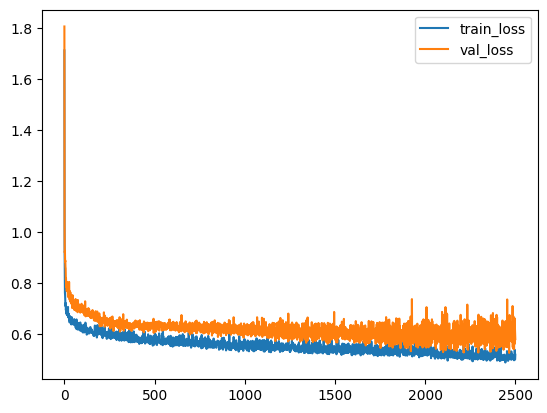

Model trained successfully!


In [40]:
pytorch_model = classifier.Net()
trainer5_6 = classifier.TrainModelPipeline(pytorch_model, lr=0.00008, momentum=0.86, weight_decay=5e-4)
trainer5_6.train(dataloader_train, dataloader_val, num_epochs=2500)

Epoch 1/2900, Loss: 1.6082, Accuracy: 0.4953%
Epoch 101/2900, Loss: 0.6165, Accuracy: 0.6542%
Epoch 201/2900, Loss: 0.5871, Accuracy: 0.6846%
Epoch 301/2900, Loss: 0.5741, Accuracy: 0.6939%
Epoch 401/2900, Loss: 0.5710, Accuracy: 0.6963%
Epoch 501/2900, Loss: 0.5495, Accuracy: 0.7079%
Epoch 601/2900, Loss: 0.5463, Accuracy: 0.7220%
Epoch 701/2900, Loss: 0.5653, Accuracy: 0.7266%
Epoch 801/2900, Loss: 0.5419, Accuracy: 0.7243%
Epoch 901/2900, Loss: 0.5711, Accuracy: 0.7150%
Epoch 1001/2900, Loss: 0.5344, Accuracy: 0.7290%
Epoch 1101/2900, Loss: 0.5289, Accuracy: 0.7430%
Epoch 1201/2900, Loss: 0.5348, Accuracy: 0.7220%
Epoch 1301/2900, Loss: 0.5456, Accuracy: 0.7243%
Epoch 1401/2900, Loss: 0.5154, Accuracy: 0.7360%
Epoch 1501/2900, Loss: 0.5078, Accuracy: 0.7477%
Epoch 1601/2900, Loss: 0.5182, Accuracy: 0.7407%
Epoch 1701/2900, Loss: 0.5260, Accuracy: 0.7383%
Epoch 1801/2900, Loss: 0.5087, Accuracy: 0.7453%
Epoch 1901/2900, Loss: 0.5010, Accuracy: 0.7430%
Epoch 2001/2900, Loss: 0.5040, A

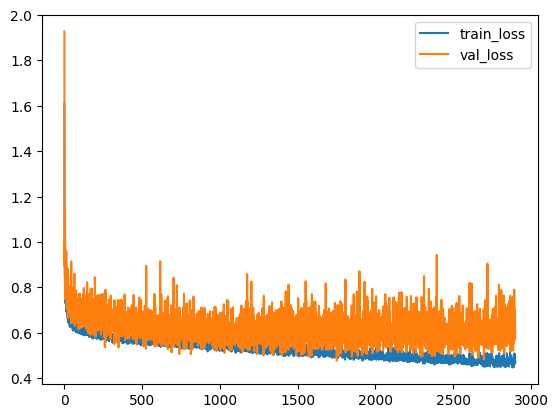

Model trained successfully!


In [41]:
pytorch_model = classifier.Net()
trainer5_7 = classifier.TrainModelPipeline(pytorch_model, lr=0.00009, momentum=0.86, weight_decay=1e-3)
trainer5_7.train(dataloader_train, dataloader_val, num_epochs=2900)

In [43]:
trainer5_7.evaluate(dataloader_val)

Evaluation step
Sample size: 170
Loss: 0.6113911867141724, Accuracy: 0.6941%


(0.6113911867141724, 0.6941176652908325)

Epoch 1/2900, Loss: 1.2714, Accuracy: 0.4112%
Epoch 101/2900, Loss: 0.6081, Accuracy: 0.6612%
Epoch 201/2900, Loss: 0.6016, Accuracy: 0.6682%
Epoch 301/2900, Loss: 0.6057, Accuracy: 0.6893%
Epoch 401/2900, Loss: 0.5989, Accuracy: 0.6963%
Epoch 501/2900, Loss: 0.5946, Accuracy: 0.7009%
Epoch 601/2900, Loss: 0.5770, Accuracy: 0.7009%
Epoch 701/2900, Loss: 0.5864, Accuracy: 0.7079%
Epoch 801/2900, Loss: 0.5886, Accuracy: 0.6822%
Epoch 901/2900, Loss: 0.5644, Accuracy: 0.7173%
Epoch 1001/2900, Loss: 0.5398, Accuracy: 0.7243%
Epoch 1101/2900, Loss: 0.5541, Accuracy: 0.7220%
Epoch 1201/2900, Loss: 0.5664, Accuracy: 0.7103%
Epoch 1301/2900, Loss: 0.5597, Accuracy: 0.7079%
Epoch 1401/2900, Loss: 0.5523, Accuracy: 0.7360%
Epoch 1501/2900, Loss: 0.5267, Accuracy: 0.7430%
Epoch 1601/2900, Loss: 0.5295, Accuracy: 0.7430%
Epoch 1701/2900, Loss: 0.5250, Accuracy: 0.7734%
Epoch 1801/2900, Loss: 0.5026, Accuracy: 0.7640%
Epoch 1901/2900, Loss: 0.5039, Accuracy: 0.7570%
Epoch 2001/2900, Loss: 0.5337, A

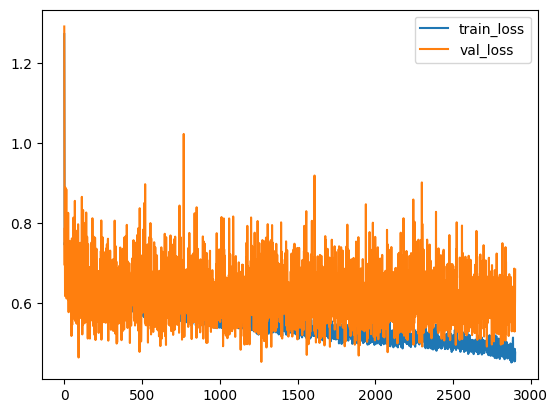

Model trained successfully!
Evaluation step
Sample size: 170
Loss: 0.6842353343963623, Accuracy: 0.6294%
(0.6842353343963623, 0.6294117569923401)


In [44]:
pytorch_model = classifier.Net()
trainer5_8 = classifier.TrainModelPipeline(pytorch_model, lr=0.0001, momentum=0.86, weight_decay=1e-3)
trainer5_8.train(dataloader_train, dataloader_val, num_epochs=2900)

print(trainer5_8.evaluate(dataloader_val))

Epoch 1/2900, Loss: 1.2853, Accuracy: 0.5280%
Epoch 101/2900, Loss: 0.5946, Accuracy: 0.6495%
Epoch 201/2900, Loss: 0.5958, Accuracy: 0.6963%
Epoch 301/2900, Loss: 0.5440, Accuracy: 0.7196%
Epoch 401/2900, Loss: 0.5675, Accuracy: 0.7313%
Epoch 501/2900, Loss: 0.5274, Accuracy: 0.7547%
Epoch 601/2900, Loss: 0.5295, Accuracy: 0.7453%
Epoch 701/2900, Loss: 0.5268, Accuracy: 0.7430%
Epoch 801/2900, Loss: 0.5441, Accuracy: 0.7430%
Epoch 901/2900, Loss: 0.4921, Accuracy: 0.7617%
Epoch 1001/2900, Loss: 0.5149, Accuracy: 0.7617%
Epoch 1101/2900, Loss: 0.5181, Accuracy: 0.7593%
Epoch 1201/2900, Loss: 0.4848, Accuracy: 0.7593%
Epoch 1301/2900, Loss: 0.4878, Accuracy: 0.7640%
Epoch 1401/2900, Loss: 0.4755, Accuracy: 0.7780%
Epoch 1501/2900, Loss: 0.4700, Accuracy: 0.7757%
Epoch 1601/2900, Loss: 0.4745, Accuracy: 0.7897%
Epoch 1701/2900, Loss: 0.4468, Accuracy: 0.7921%
Epoch 1801/2900, Loss: 0.4341, Accuracy: 0.8061%
Epoch 1901/2900, Loss: 0.4346, Accuracy: 0.7804%
Epoch 2001/2900, Loss: 0.4250, A

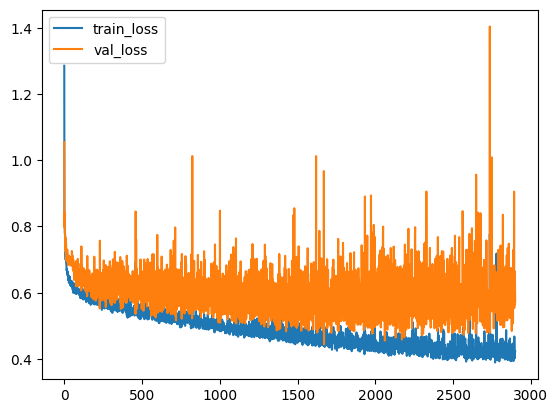

Model trained successfully!


In [46]:
pytorch_model = classifier.Net()
trainer5_9 = classifier.TrainModelPipeline(pytorch_model, lr=0.0001, momentum=0.86, weight_decay=5e-4)
trainer5_9.train(dataloader_train, dataloader_val, num_epochs=2900)

In [47]:
print(trainer5_9.evaluate(dataloader_val))

Evaluation step
Sample size: 170
Loss: 0.5734637379646301, Accuracy: 0.7235%
(0.5734637379646301, 0.7235293984413147)


Epoch 1/5000, Loss: 2.6245, Accuracy: 0.5070%
Epoch 101/5000, Loss: 0.5993, Accuracy: 0.6846%
Epoch 201/5000, Loss: 0.5755, Accuracy: 0.7009%
Epoch 301/5000, Loss: 0.5606, Accuracy: 0.7150%
Epoch 401/5000, Loss: 0.5505, Accuracy: 0.7313%
Epoch 501/5000, Loss: 0.5714, Accuracy: 0.7243%
Epoch 601/5000, Loss: 0.5505, Accuracy: 0.7383%
Epoch 701/5000, Loss: 0.5150, Accuracy: 0.7383%
Epoch 801/5000, Loss: 0.5174, Accuracy: 0.7407%
Epoch 901/5000, Loss: 0.5168, Accuracy: 0.7500%
Epoch 1001/5000, Loss: 0.5067, Accuracy: 0.7523%
Epoch 1101/5000, Loss: 0.5181, Accuracy: 0.7687%
Epoch 1201/5000, Loss: 0.4936, Accuracy: 0.7734%
Epoch 1301/5000, Loss: 0.4830, Accuracy: 0.7710%
Epoch 1401/5000, Loss: 0.5007, Accuracy: 0.7780%
Epoch 1501/5000, Loss: 0.4803, Accuracy: 0.7874%
Epoch 1601/5000, Loss: 0.4529, Accuracy: 0.7967%
Epoch 1701/5000, Loss: 0.4597, Accuracy: 0.8107%
Epoch 1801/5000, Loss: 0.4746, Accuracy: 0.7967%
Epoch 1901/5000, Loss: 0.4536, Accuracy: 0.8178%
Epoch 2001/5000, Loss: 0.4992, A

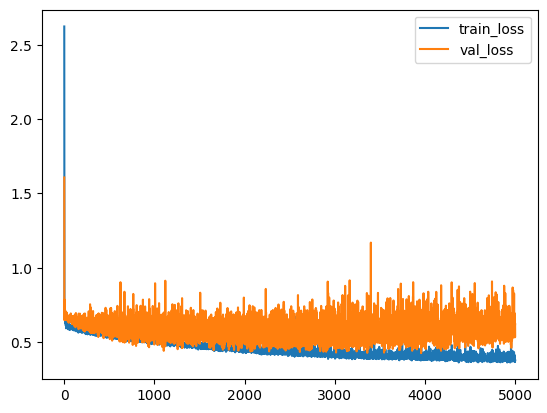

Model trained successfully!


In [48]:
pytorch_model = classifier.Net()
trainer5_91 = classifier.TrainModelPipeline(pytorch_model, lr=0.0001, momentum=0.86, weight_decay=5e-4)
trainer5_91.train(dataloader_train, dataloader_val, num_epochs=5000)

In [49]:
print(trainer5_91.evaluate(dataloader_val))

Evaluation step
Sample size: 170
Loss: 0.538619875907898, Accuracy: 0.7588%
(0.538619875907898, 0.7588235139846802)


Epoch 1/3000, Loss: 1.0323, Accuracy: 0.5491%
Epoch 101/3000, Loss: 0.6552, Accuracy: 0.6729%
Epoch 201/3000, Loss: 0.6293, Accuracy: 0.6706%
Epoch 301/3000, Loss: 0.6183, Accuracy: 0.6822%
Epoch 401/3000, Loss: 0.6007, Accuracy: 0.6799%
Epoch 501/3000, Loss: 0.5999, Accuracy: 0.6869%
Epoch 601/3000, Loss: 0.5784, Accuracy: 0.6822%
Epoch 701/3000, Loss: 0.5696, Accuracy: 0.6893%
Epoch 801/3000, Loss: 0.5813, Accuracy: 0.6846%
Epoch 901/3000, Loss: 0.5917, Accuracy: 0.6893%
Epoch 1001/3000, Loss: 0.5765, Accuracy: 0.6963%
Epoch 1101/3000, Loss: 0.5536, Accuracy: 0.6939%
Epoch 1201/3000, Loss: 0.5439, Accuracy: 0.7313%
Epoch 1301/3000, Loss: 0.5324, Accuracy: 0.7196%
Epoch 1401/3000, Loss: 0.5316, Accuracy: 0.7453%
Epoch 1501/3000, Loss: 0.5367, Accuracy: 0.7290%
Epoch 1601/3000, Loss: 0.5317, Accuracy: 0.7196%
Epoch 1701/3000, Loss: 0.5204, Accuracy: 0.7360%
Epoch 1801/3000, Loss: 0.5207, Accuracy: 0.7430%
Epoch 1901/3000, Loss: 0.5073, Accuracy: 0.7407%
Epoch 2001/3000, Loss: 0.5167, A

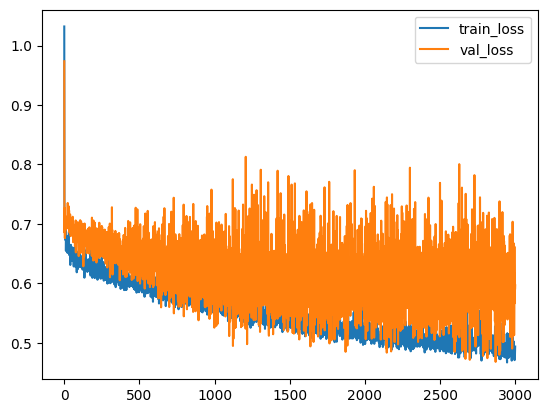

Model trained successfully!


In [51]:
pytorch_model = classifier.Net()
trainer5_92 = classifier.TrainModelPipeline(pytorch_model, lr=0.0001, momentum=0.86, weight_decay=7e-4)
trainer5_92.train(dataloader_train, dataloader_val, num_epochs=3000)

In [52]:
print(trainer5_92.evaluate(dataloader_val))

Evaluation step
Sample size: 170
Loss: 0.5966237783432007, Accuracy: 0.6882%
(0.5966237783432007, 0.6882352828979492)


Epoch 1/3000, Loss: 1.3941, Accuracy: 0.4836%
Epoch 101/3000, Loss: 0.6944, Accuracy: 0.5000%
Epoch 201/3000, Loss: 0.6934, Accuracy: 0.5000%
Epoch 301/3000, Loss: 0.6932, Accuracy: 0.5000%
Epoch 401/3000, Loss: 0.6932, Accuracy: 0.4930%
Epoch 501/3000, Loss: 0.6930, Accuracy: 0.4836%
Epoch 601/3000, Loss: 0.6931, Accuracy: 0.4953%
Epoch 701/3000, Loss: 0.6928, Accuracy: 0.5047%
Epoch 801/3000, Loss: 0.6926, Accuracy: 0.5070%
Epoch 901/3000, Loss: 0.6916, Accuracy: 0.5421%
Epoch 1001/3000, Loss: 0.6826, Accuracy: 0.5724%
Epoch 1101/3000, Loss: 0.6255, Accuracy: 0.6869%
Epoch 1201/3000, Loss: 0.6013, Accuracy: 0.6799%
Epoch 1301/3000, Loss: 0.6253, Accuracy: 0.6986%
Epoch 1401/3000, Loss: 0.6075, Accuracy: 0.7126%
Epoch 1501/3000, Loss: 0.5917, Accuracy: 0.7126%
Epoch 1601/3000, Loss: 0.6145, Accuracy: 0.7056%
Epoch 1701/3000, Loss: 0.5940, Accuracy: 0.7173%
Epoch 1801/3000, Loss: 0.5852, Accuracy: 0.7243%
Epoch 1901/3000, Loss: 0.5704, Accuracy: 0.7266%
Epoch 2001/3000, Loss: 0.5699, A

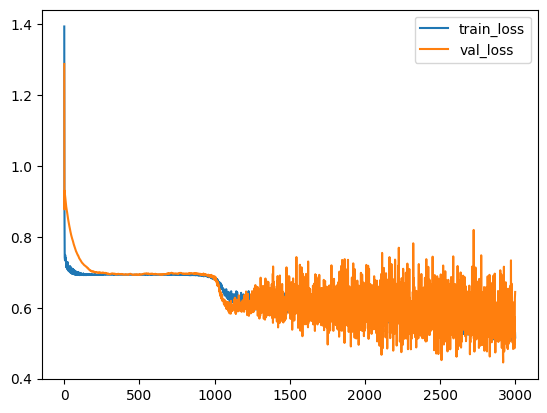

Model trained successfully!


In [53]:
pytorch_model = classifier.Net()
trainer5_93 = classifier.TrainModelPipeline(pytorch_model, lr=0.0001, momentum=0.86, weight_decay=3e-4)
trainer5_93.train(dataloader_train, dataloader_val, num_epochs=3000)

Epoch 1/5000, Loss: 0.8921, Accuracy: 0.5397%
Epoch 101/5000, Loss: 0.5726, Accuracy: 0.7313%
Epoch 201/5000, Loss: 0.4902, Accuracy: 0.7593%
Epoch 301/5000, Loss: 0.5226, Accuracy: 0.7593%
Epoch 401/5000, Loss: 0.4917, Accuracy: 0.7593%
Epoch 501/5000, Loss: 0.4708, Accuracy: 0.7710%
Epoch 601/5000, Loss: 0.4646, Accuracy: 0.7734%
Epoch 701/5000, Loss: 0.5029, Accuracy: 0.7664%
Epoch 801/5000, Loss: 0.4941, Accuracy: 0.7734%
Epoch 901/5000, Loss: 0.4492, Accuracy: 0.7710%
Epoch 1001/5000, Loss: 0.4455, Accuracy: 0.7734%
Epoch 1101/5000, Loss: 0.5282, Accuracy: 0.7407%
Epoch 1201/5000, Loss: 0.4628, Accuracy: 0.7804%
Epoch 1301/5000, Loss: 0.4710, Accuracy: 0.7710%
Epoch 1401/5000, Loss: 0.4404, Accuracy: 0.7991%
Epoch 1501/5000, Loss: 0.4454, Accuracy: 0.7734%
Epoch 1601/5000, Loss: 0.4335, Accuracy: 0.7991%
Epoch 1701/5000, Loss: 0.5018, Accuracy: 0.7874%
Epoch 1801/5000, Loss: 0.4759, Accuracy: 0.7687%
Epoch 1901/5000, Loss: 0.4277, Accuracy: 0.7804%
Epoch 2001/5000, Loss: 0.4962, A

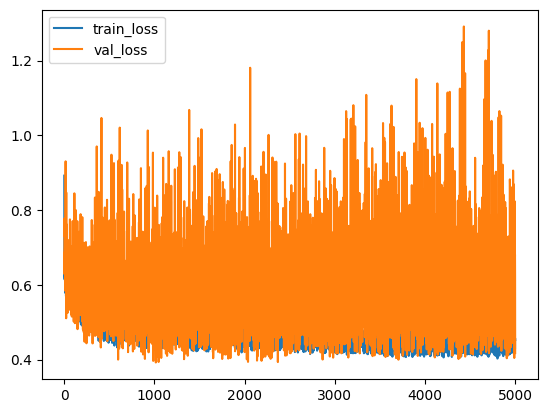

Model trained successfully!


In [24]:
pytorch_model = classifier.Net()
trainer6 = classifier.TrainModelPipeline(pytorch_model, lr=0.001, momentum=0.86)
trainer6.train(dataloader_train, dataloader_val, num_epochs=5000)

In [54]:
print(trainer5_91.evaluate(dataloader_test))

Evaluation step
Sample size: 170
Loss: 0.557172954082489, Accuracy: 0.7706%
(0.557172954082489, 0.770588219165802)
